In [7]:
!pwd

/home/dvp/dev/mckit-meshes/notebooks/plotting


# Deepseek

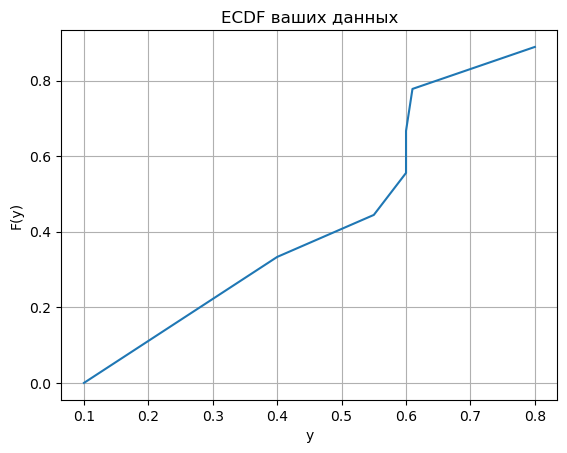

In [5]:
import matplotlib.pyplot as plt

# Ваши данные
x_data = [0.1, 0.3, 0.55, 0.6, 0.61, 0.2, 0.4, 0.6, 0.8] # пример

# Сортируем данные
x_sorted = sorted(x_data)

# Вычисляем значения ECDF
n = len(x_sorted)
y_vals = [i / n for i in range(n)]

# Строим график
# plt.step(x_sorted, y_vals, where='post')
plt.plot(x_sorted, y_vals)
plt.xlabel('y')
plt.ylabel('F(y)')
plt.title('ECDF ваших данных')
plt.grid(True)
plt.show()

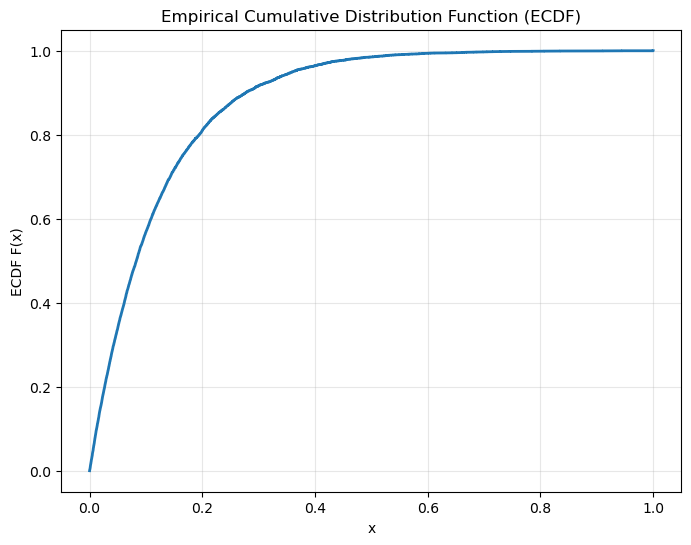

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Пример данных (x от 0 до 1)
np.random.seed(42)
data = np.random.exponential(0.01, size=10000)
data /= data.max()

# Сортируем данные и вычисляем ECDF
sorted_data = np.sort(data)
ecdf_values = np.arange(1, len(data) + 1) / len(data)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, ecdf_values, drawstyle='steps-post', linewidth=2)
plt.xlabel('x')
plt.ylabel('ECDF F(x)')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.grid(True, alpha=0.3)
plt.show()

## Me

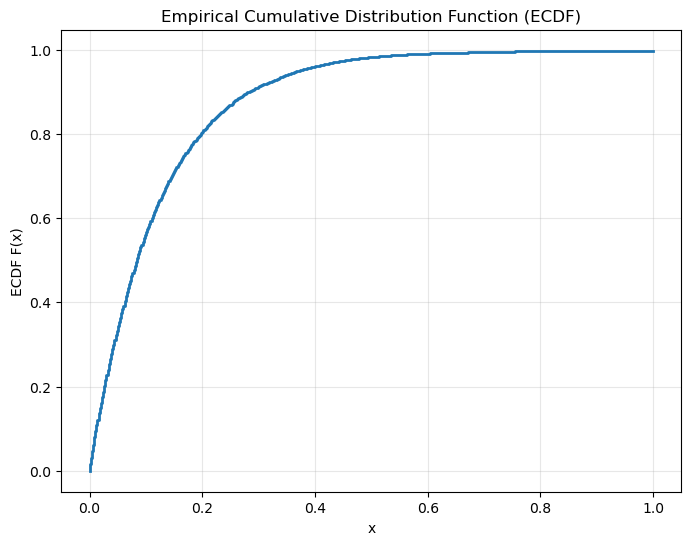

In [6]:
data = np.random.exponential(0.01, size=10000)
data /= data.max()
da, db = np.histogram(data, bins=500, density = True)
da = np.insert(da, 0, 0)
plt.figure(figsize=(8, 6))
plt.plot(db, da.cumsum()/db.size, drawstyle='steps-pre', linewidth=2)
plt.xlabel('x')
plt.ylabel('ECDF F(x)')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.grid(True, alpha=0.3)
plt.show()

## Alice

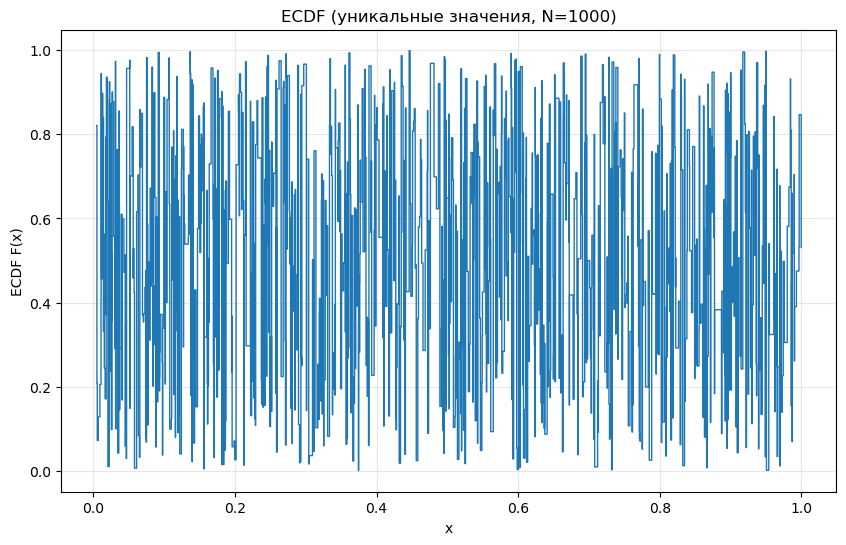

In [5]:

import numpy as np
import matplotlib.pyplot as plt

# Данные (1 млн точек)
np.random.seed(42)
data = np.random.uniform(0, 1, size=1_000)

# Сортируем и находим уникальные значения + их индексы
unique_x, unique_indices = np.unique(data, return_index=True)

# Вычисляем ECDF только для уникальных x
ecdf_values = unique_indices / len(data)  # индекс = число элементов <= x

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(unique_x, ecdf_values, drawstyle='steps-post', linewidth=1)
plt.xlabel('x')
plt.ylabel('ECDF F(x)')
plt.title('ECDF (уникальные значения, N={})'.format(len(unique_x)))
plt.grid(True, alpha=0.3)
plt.show()

In [1]:
import altair as alt
import pandas as pd
import numpy as np

np.random.seed(42)
data = np.random.uniform(0, 1, size=1_000_000)

# Шаг 1: гистограмма
n_bins = 500
counts, bin_edges = np.histogram(data, bins=n_bins, range=(0, 1))

# Шаг 2: накопленные доли
ecdf_values = np.cumsum(counts) / len(data)
x_values = bin_edges[1:]

# Создаём DataFrame
df = pd.DataFrame({
    'x': x_values,
    'ecdf': ecdf_values
})

# Строим график
chart = alt.Chart(df).mark_line(
    interpolate='step-after',
    strokeWidth=1
).encode(
    x=alt.X('x:Q', title='x'),
    y=alt.Y('ecdf:Q', title='ECDF F(x)'),
).properties(
    title=f'ECDF via np.histogram (N_bins={n_bins})',
    width=700,
    height=400
)
chart.display()

TypeError: _TypedDictMeta.__new__() got an unexpected keyword argument 'closed'

In [2]:
import sys
sys.version

'3.14.0 | packaged by conda-forge | (main, Oct 22 2025, 23:24:08) [GCC 14.3.0]'